# Laboratory 2.4: Linear Regression contd.

In this practice you will extend your Linear Regression code to a more general case. Here you will need the `synthetic_dataset.csv` present in the .zip file you downloaded alongside this notebook.

In addition, we will be using the following libraries:
- Data management:
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
    - [scipy](https://scipy.org/)
- Modelling:
    - [scikit-learn](https://scikit-learn.org)
- Plotting:
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)
    
### **All the things you need to do are marked by a "TODO" comment nearby. Make sure you *read carefully everything before working* and solve each point before submitting your solution.**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os
import sys
# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.insert(0, project_root)

### Custom Linear Regression model

You are going to be working with the following class that you already know from the previous practice, so feel free to recycle as much code as you want (or can). In this case, you will be enhancing its functionalities, getting a more general function than the one you implemented before. 

**For now, just continue with the practice and do not fill anything, you will come back later to fill the gaps.**

In [4]:
from src.Lab_2_4_LR2 import LinearRegressor


**Data**: Remember, from the previous lab session, we had the following univariate dataset:

In [5]:
# Define data to use in this practice
x = np.array([0, 3, 2, 1, 4, 6, 7, 8, 9, 10])
y = np.array([2, 3, 2, 4, 5, 7, 9, 9, 10, 13])

Use the code *you wrote* from the previous practice (not the sklearn version) to fit the data in the following cell

In [6]:
linreg = LinearRegressor()
linreg.fit(x, y)

Before we get into the things you'll do today, let's construct a function that provides the values for the $R^2$, RMSE and MAE. For this, the inputs of this function are the true $y$ values and the predicted $\hat{y}$ values

In [7]:
from src.Lab_2_4_LR2 import evaluate_regression

In [8]:
# Obtain regression performance metrics
y_pred = linreg.predict(x)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': np.float64(0.9201359388275276), 'RMSE': np.float64(1.012647295683223), 'MAE': np.float64(0.8945454545454539)}


## Polynomial regression

In the previous practice, you have trained a model assuming that the relationship between input and output is linear. However, in most real cases this is not common and the relationship between input and output is not linear. In this section, we are going to learn how to deal with non-linear relationships when using linear models. Read `synthetic_dataset.csv` and train a linear regression model. 

*The target variable is the last column of the dataset*

In [9]:
data = pd.read_csv("synthetic_dataset.csv")


# TODO: Obtain inputs and output from data

X = np.array(data[['Input1','Input2','Input3','Input4']]) # 4 variables/features
y = np.array(data['Output'])
X


array([[ 1.76405235e+00, -2.02117027e-01,  3.30045889e-01,
         3.71232144e-01],
       [ 4.00157208e-01, -8.33231001e-01, -4.79979434e-04,
         3.04783891e-01],
       [ 9.78737984e-01,  1.73360025e+00,  8.18115898e-01,
         5.04124602e-01],
       ...,
       [ 5.16872179e-01, -5.72592527e-02, -1.51127631e+00,
         1.68985759e+00],
       [-3.29206931e-02, -1.05893126e+00,  9.76843833e-01,
         1.99966492e-01],
       [ 1.29811143e+00, -3.26528442e-01,  1.25550065e+00,
        -1.22433070e+00]], shape=(10000, 4))

In this case we will skip the preprocessing and go straight to the modelling phase. Therefore, fit the model here.

In [10]:
# TODO: Train linear regression model
model=LinearRegressor()
model.fit(X, y, method="least_squares")

In [11]:
# TODO: Obtain and print the regression performance metrics
y_pred = model.predict(X)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)


{'R2': np.float64(0.5452814241832913), 'RMSE': np.float64(3.1936452748702817), 'MAE': np.float64(2.2373945210247843)}


If you trained the model well, the $R^2$ metric will be terrible, in the order of $0.5$. **What happened here?** Let's try to clear this via the *study of the residuals*.

Create a function to plot the residuals of the model. This function shall:
- Create a **histogram** of the residuals.
- Create a **Q-Q plot** of the residuals.
- Create a **scatterplot of the residuals against each input variable, the true output variable and the predictions**.

**Why do we want to check the residuals this way?** 

> Write your answer here

> histograma: nos ayuda visualizar la forma que tiene el residuo y asi identficar su distribucion, idealmente tendria forma de normal centrada en 0.

>qq-plot: sirve para comparar la distribucion de los datos con la de alguna distribucion, como estamos tratando residuals (errores) lo comparamos con una normal que seria lo ideal.

> scatterplot resiudals vs output: nos interesa para ver si a nuestro modelo le esta costando mas predecir ciertos valores lo cual podria indicar un sesgo

>scatterplot residuals vs prediction: nos interesa para ver si los errores estan distribuidos de manera uniforme a lo largo de los valores. si este no es el caso indica que no tiene una varianza constane.

> scatterplot residuals vs input variables: nos ayuda identificar si hay patrones en los residuos para ciertas features. 

In [12]:
def plot_residuals(data, output_column, prediction_column):
    """
    Plot residuals of a model against all variables in the DataFrame, using box plots for
    categorical variables and scatter plots for continuous variables. Additionally, plot
    a histogram and a QQ-plot of the residuals.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        output_column (str): The name of the output column.
        prediction_column (str): The name of the prediction column.
    """
    # TODO: Calculate residuals
    output=data[output_column].to_numpy()
    prediction=data[prediction_column].to_numpy()
    residuals = output-prediction
    
    num_features = len(data.columns) - 2  # Exclude output and prediction columns

    # Determine the number of rows and columns for subplots
    num_rows = int(np.ceil(np.sqrt(num_features + 4)))  # Add 4 for histogram, Q-Q plot, true output vs residuals, and predictions vs residuals
    num_cols = int(np.ceil((num_features + 4) / num_rows))

    # Plot histogram of residuals
    plt.figure(figsize=(5 * num_cols, 4 * num_rows))
    plt.subplot(num_rows, num_cols, 1)
    plt.hist(residuals, bins=30, edgecolor='black')
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # TODO: Plot Q-Q plot of residuals (tip: use stats.probplot from scipy)
    plt.subplot(num_rows, num_cols, 2)
    stats.probplot(residuals, dist="norm", plot=plt)       # Fill the code here
    plt.title('Q-Q Plot of Residuals')

    # TODO: Plot residuals against output variable
    plt.subplot(num_rows, num_cols, 3)
    plt.scatter(output, residuals, alpha=0.5)     # Fill the code here
    plt.title('Residuals vs True Output')
    plt.xlabel('True Output')
    plt.ylabel('Residuals')

    # Plot residuals against prediction variable
    plt.subplot(num_rows, num_cols, 4)
    plt.scatter(prediction, residuals, alpha=0.5)   # Use this as example for later
    plt.title('Residuals vs Predictions')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')

    # TODO: Plot residuals against each input variable
    for i, col in enumerate(data.columns):
        if col not in [output_column, prediction_column]:
            plt.subplot(num_rows, num_cols, i + 5)
            plt.scatter(data[col].to_numpy(), residuals, alpha=0.5)   # Fill the code here
            plt.title(f'Residuals vs {col}')
            plt.xlabel(col)
            plt.ylabel('Residuals')

    plt.tight_layout()
    plt.show()

Now, **print the coefficients** of the model **alongside the plots** you can generate with the previous function

Coefficients of the model: {'w1': np.float64(1.6303240019912557), 'w2': np.float64(3.059308730603961), 'b': np.float64(3.584902159274908)}


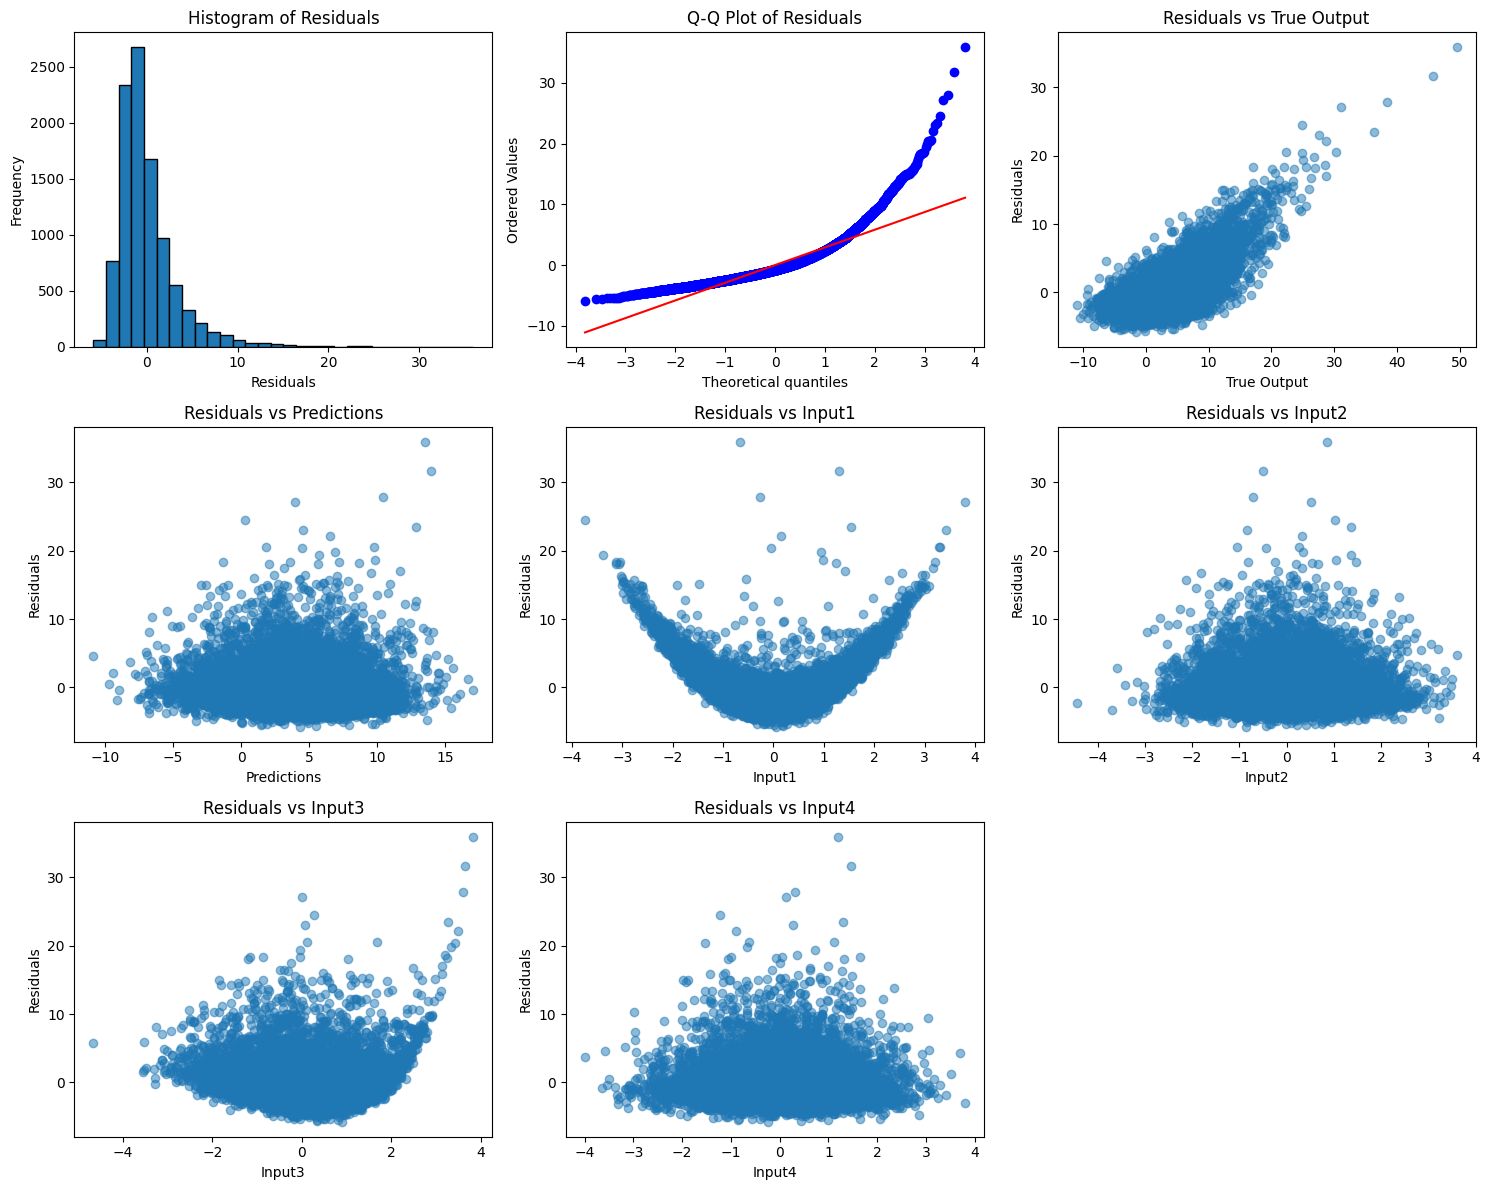

In [13]:
# TODO:  First, construct a dictionary of the coefficients to print them

w=model.coefficients
b=model.intercept

coef_dict = {'w1':w[0],'w2':w[1],'w1':w[2],'w2':w[3],'b':b}
print(f"Coefficients of the model: {coef_dict}")

# Plot the residuals for the predictions
data["Predictions"] = model.predict(X)
plot_residuals(data, 'Output', 'Predictions')

**What are we seeing here? Is there any way to improve the model?**
> Write your answer here

> Observando el histograma y el qq plto vemos que los residuals no se asemejan mucho a una normal. La distribucion es asimetrica con una cola alargada hacia la derecha, lo cual puede indicar que no esta capturando bien patrones en los datos.

> En grafico de los resiudals vs el output vemos que parece haber un tendencia hacia arriba. Hay mas resiudo para valores mas altos lo cual nos indica que puede estar sesgado para estos valores.

> En el grafico de resiudals vs predictions vemos que no estan distribuidos unfirome y tienen una forma de nube concava centrada alrededor de 4. Esto nos indica que puede haber problemas de heteroscedatsticidad, que la varianza de los residuos varia.

> En los graficos de residuals vs inputs vemos que parece existsir patrones entre el resiuduo y las variables ya que niguno se distribullo uniformemente. Resaltamos el input 1 ya que tiene una forma de curva convexa. Esto nos puede idnicar una realcion no lineal entre las variables.

As you may expect, you should see some higher-order contribution to the behavior of the data, since some of the residuals have clear structures. In particular, `Input1` has a higher-order polynomial contribution (*which order do you think?*), while `Input2` has an *exponential* form. 

In order to fit a regression model with these contributions, construct a new dataframe where each column corresponds to the desired manipulation of each variable. Then, fit the regression model and see the results.

* Also, pay attention to the fact that you can use whatever contribution you see fit here, not just these previous ones.

In [14]:
# TODO
input1=data['Input1']
input2=data['Input2']
input3=data['Input3']
input4=data['Input4']
output=data['Output']
data_transf = pd.DataFrame({'Input1': input1 ** 2,   # Substitute "None" by the degree you think works here
                            'Input2': np.exp(input3),
                            'Input3': input4,
                            'Output': output})

# data_transf = pd.DataFrame({'Input1': input1 ** 2,   # Substitute "None" by the degree you think works here
#                             'Input2': input2,
#                             'Input3': np.exp(input3),
#                             'Input4': input4,
#                             'Output': output})
X_transf = data_transf.iloc[:,:3].values

# Train linear regression model
linreg = LinearRegressor()
linreg.fit(X_transf, y)

# Evaluate the metrics to see the behavior
y_pred = linreg.predict(X_transf)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)


{'R2': np.float64(0.9557524745534756), 'RMSE': np.float64(0.9962304737909358), 'MAE': np.float64(0.7956340344398113)}


Now, print again the coefficients for the model and plot the residuals as you did before.

**What do you observe?**
> Write your answer here

> En cuanto al histograma y al qq plot vemos que ahora si que se parece mucho a una distribucion normal. Esto es indicador de que el modelo es bueno y que no tiene nigun sesgo.

> En el scatter de resiudals vs True output vemos que hay una nube ovalada inclinada hacia la derecha por lo que el patron no es completamente aleatorio y puede que este conetuebdi errores. esta centrada en 0 lo cual es bueno por que indica que hay poco error. El plot de predictions es similar.

> En los scatter de los inputs vemos que tambien parece haber mejorado los resiudos ya qu ela mayor concentracion se encuentra alrededor de 0.

Coefficients of the model: {'Input1': np.float64(1.9985407741302774), 'Input2': np.float64(0.995125930021854), 'Input3': np.float64(2.9880699293625486)}


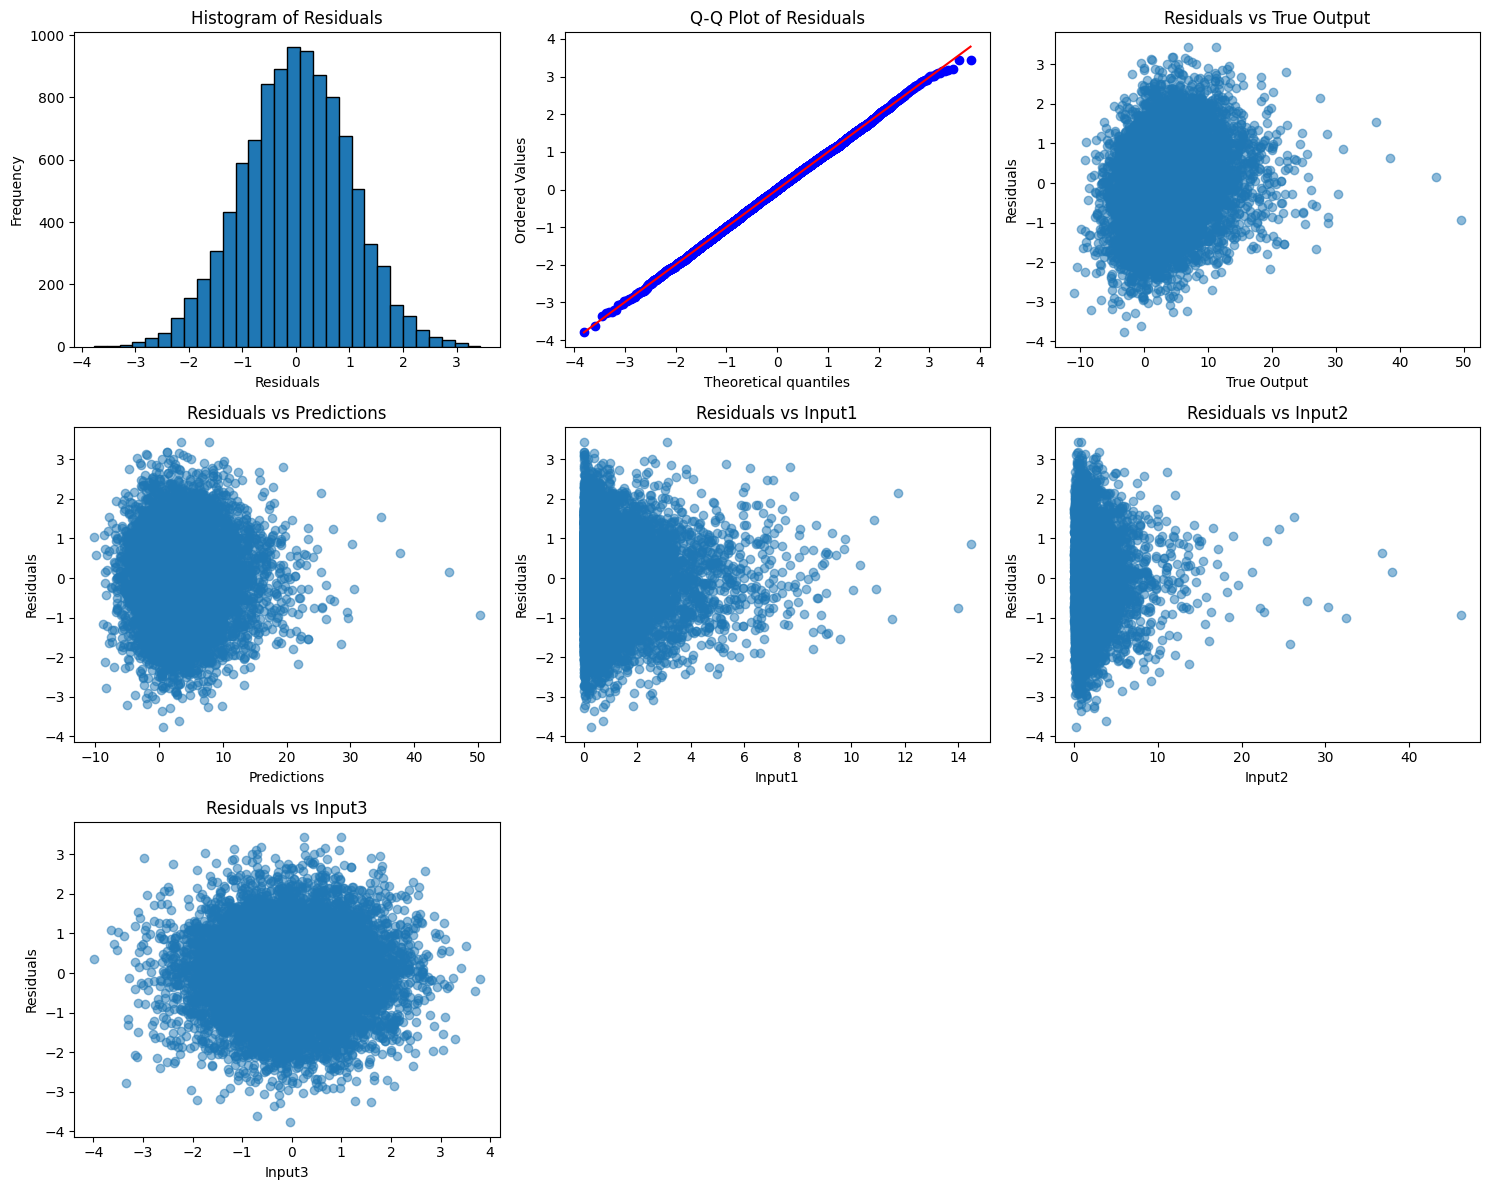

In [15]:
coef_dict = {'Input' + str(i+1): coef for i, coef in enumerate(linreg.coefficients)}
print(f"Coefficients of the model: {coef_dict}")
data_transf["Predictions"] = linreg.predict(X_transf)
plot_residuals(data_transf, 'Output', 'Predictions')

## Categorical variables

Linear regression, as is, can not deal with categorical variables. Therefore, we need to encode the variables when preprocessing the data. Complete the one-hot-encode function below. Take into account that strings shall be treated automatically as categorical variables.
<center>

![Image](https://miro.medium.com/v2/resize:fit:1358/1*ggtP4a5YaRx6l09KQaYOnw.png)

</center>

In [16]:
from src.Lab_2_4_LR2 import one_hot_encode


We will use this in a usual dataset from the internet. If everything is well, you should be able to run the following code as-is.

In [17]:

def one_hot_encode(X, categorical_indices, drop_first=False):
    """
    One-hot encode the categorical columns specified in categorical_indices. This function
    shall support string variables.

    Args:
        X (np.ndarray): 2D data array.
        categorical_indices (list of int): Indices of columns to be one-hot encoded.
        drop_first (bool): Whether to drop the first level of one-hot encoding to avoid multicollinearity.

    Returns:
        np.ndarray: Transformed array with one-hot encoded columns.
    """
    X_transformed = X.copy()
    contador=0
    contador_next=contador
    for index in sorted(categorical_indices, reverse=True):
       
        # TODO: Extract the categorical column
        categorical_column = X[:, index]
        
        # TODO: Find the unique categories (works with strings)
        unique_values = np.unique(categorical_column)
        contador_next+=len(unique_values)
        # TODO: Create a one-hot encoded matrix (np.array) for the current categorical column
        matrix=[]
        for value in unique_values:
           
            column=[]
            for value_instance in categorical_column:
                if value==value_instance:
                    
                    column.append(1)
                else:
                    column.append(0)
            matrix.append(column)
      
      

        one_hot = np.array(matrix).T
        
        # Optionally drop the first level of one-hot encoding
        if drop_first:
            one_hot = one_hot[:, 1:]
            contador_next-=1
       
        # TODO: Delete the original categorical column from X_transformed and insert new one-hot encoded columns
        # print('bf drop')
        # print(X_transformed)

        X_transformed=np.delete(X_transformed,index+contador,axis=1)
        contador=contador_next
        # print('after drop')
        # print(X_transformed)
        X_transformed=np.concatenate((one_hot,X_transformed), axis=1)

        

    return X_transformed

In [18]:
# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)
print(data)

y = data['charges'].values
X = data.drop(columns=['charges']).values

# Preprocess the data
# Identify categorical columns for one-hot encoding
categorical_columns = [data.columns.get_loc(col) for col in ['sex', 'smoker', 'region']]

# One-hot encode categorical variables
X_encoded = one_hot_encode(X, categorical_columns, drop_first=True)
# 1 si es male 0 si es female
# 1 si es yes 0 si es no
# 000 northeast, 100 northwest, 010, southeast, 001 southwest
X_encoded = X_encoded.astype(float)                                  # Watch out for this!
X_encoded
# # Instantiate and fit the LinearRegressor
model = LinearRegressor()
model.fit(X_encoded, y)

# Predict and evaluate
y_pred = model.predict(X_encoded)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
{'R2': np.float64(0.7509130345985205), 'RMSE': np.float64(6041.679651174452), 'MAE': np.float64(4170.886894163594)}


Compare yourself with scikit

In [19]:
from sklearn.linear_model import LinearRegression

# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)

# Preprocess the data
# TODO: One-hot encode categorical variables. Use pd.get_dummies()
data_encoded = pd.get_dummies(data) 

# Split the data into features (X) and target (y)
X = data_encoded.drop('charges', axis=1)

y = data_encoded['charges']

# Instantiate the LinearRegression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X, y)

# Make predictions on the test data
y_pred = model.predict(X)

# Evaluate the model
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)


{'R2': np.float64(0.7509130345985205), 'RMSE': np.float64(6041.6796511744515), 'MAE': np.float64(4170.886894163588)}


### Colored residuals

Now that we have categorical variables, the relationship between inputs and outputs might differ for different levels of the categorical variables. Therefore, you will modify the `plot_residuals` function to **color the scatter plots based on the value of a specific categorical variable**.

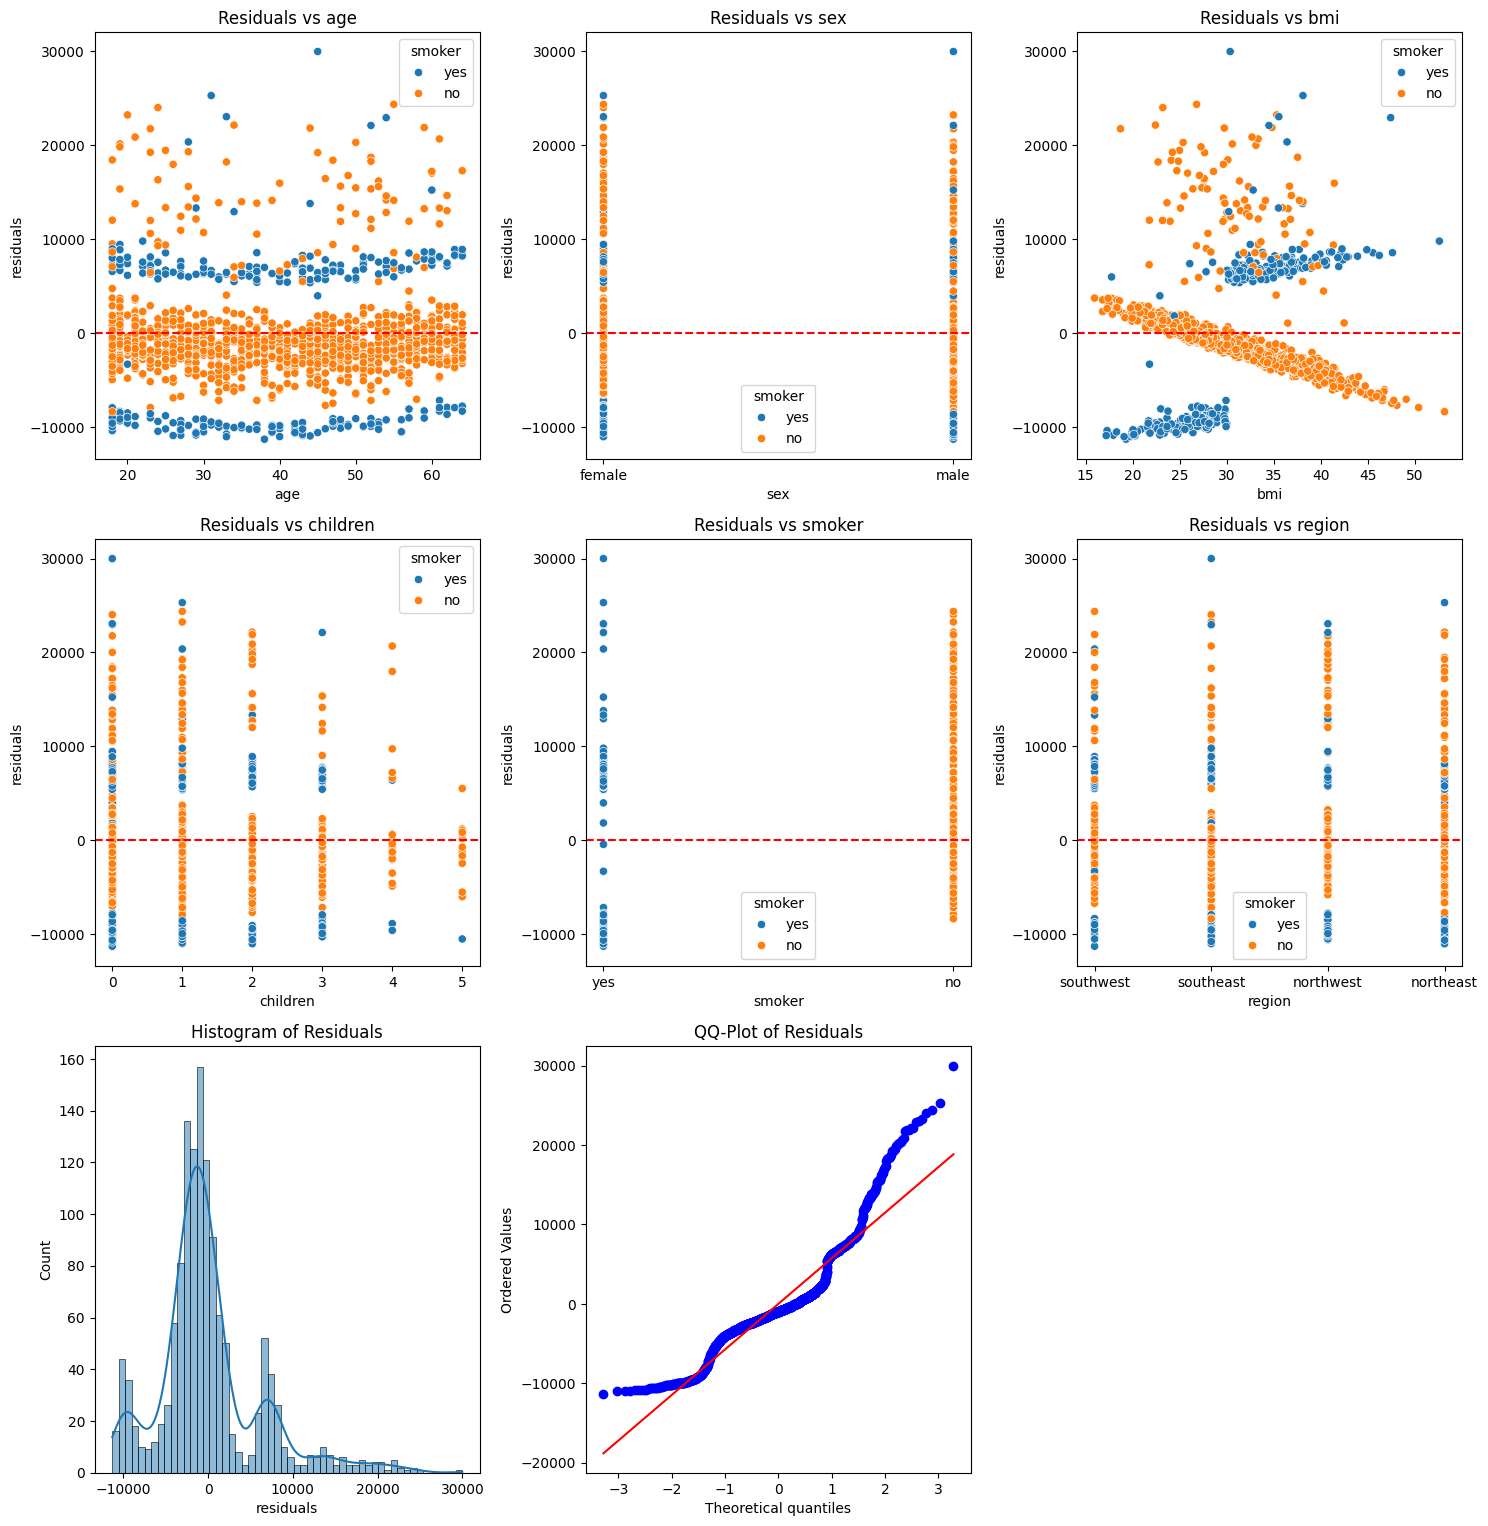

In [20]:
def plot_residuals(data, output_column, prediction_column, categorical_var=None):
    """
    Plot residuals of a model against all variables in the DataFrame. Additionally, plot
    a histogram and a QQ-plot of the residuals.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        output_column (str): The name of the output column.
        prediction_column (str): The name of the prediction column.
        categorical_var (str, optional): The name of a categorical variable for coloring. Defaults to None.
    """
    # TODO: As before, calculate residuals
    output=data[output_column].to_numpy()
    prediction=data[prediction_column].to_numpy()
    residuals = output-prediction
    data['residuals'] = residuals

    # Identify columns to plot (excluding the output and prediction columns)
    columns_to_plot = [col for col in data.columns if col not in [output_column, prediction_column, 'residuals']]

    # Number of rows and columns for the subplot
    n_cols = 3
    n_rows = int(len(columns_to_plot) / n_cols) + 2  # Additional row for histogram and QQ-plot

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # TODO: Plot each variable against the residuals
    for i, col in enumerate(columns_to_plot):
        ax = axes[i]
        
        if categorical_var and categorical_var in data.columns:
            sns.scatterplot(x = data[col], y = data['residuals'], data=data, ax=ax, hue = data[categorical_var])
        else:
            sns.scatterplot(x = data[col], y = data['residuals'], data=data, ax=ax)
        
        ax.set_title(f'Residuals vs {col}')
        ax.axhline(0, ls='--', color='r')

    # Histogram of residuals
    sns.histplot(data['residuals'], kde=True, ax=axes[i + 1])
    axes[i + 1].set_title('Histogram of Residuals')

    # QQ-plot of residuals
    stats.probplot(data['residuals'], dist="norm", plot=axes[i + 2])
    axes[i + 2].set_title('QQ-Plot of Residuals')

    # Hide any unused axes
    for j in range(i + 3, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

data['predictions'] = model.predict(X)
# Example usage
plot_residuals(data, 'charges', 'predictions', 'smoker')


**What's happening with the residuals?**
> residuals vs age: observamos como el modelo parece que no esta generalizando bien para las personas fumadoras. Observamo sel residuo para los no fumadores esta alrededro del 0 distribuido unfiromemente por la recta, en cambia para los fumadores hay un grupo que los sobre esstima y otro que los subestima.

> residuals vs sex, children, region: aqui comparamos los residuos con las variables categircsd y von uns discreta (children) en todas las graficas observamos que parece haber patrones parecidos donde las instancias de fumadores se agrupan alrededor del -10000 y 10000.

> resiudals vs bmi: los datos de ls distintas catgorias se agrupan formando grupos, por ejemplo los de no fumadores forman una especie de recta. esto podroa indicar una realcion no lineal que estamos ignorando.

> hsitograma y qq plot: vemos qu eno se asemeja mucho auna normal, parece tener una cola pesada, puede que el modelo este sesgado para ciertos datos.

# _Rolling in the deep_

Following the theory taught in class, do the following:

1. **implement the gradient descent algorithm** to train the linear regression model and reproduce the results using this training method. You can find the structure for the gradient descent inside the initial linear regression function, inside the method `fit_gradient_descent`.
2. As final steps, **display the progress of the loss function by plotting the gradient descent steps on the X-axis and the loss function on the Y-axis for each step**. 
3. Additionally, **using the same representation as in the previous section where each axis represents the values of w and b, show the sequence of steps that bring you closer to the optimum each time**. Each step should be a point in space, with coordinates (w,b). Compare all the results with the optimal solution from the scikit fit coefficients.

Feel free to add as many cells as you may need from here onwards in order to fulfill these three tasks

> 1. Implementamos el algoritmo de descenso de gradiente, aqui tenemos una version de la clase linear regessor adaptada para poder plotear cada paso del algoritmo

In [ ]:
import time
class LinearRegressor:
    """
    Extended Linear Regression model with support for categorical variables and gradient descent fitting.
    """

    def __init__(self):
        self.coefficients = None
        self.intercept = None

    """
    This next "fit" function is a general function that either calls the *fit_multiple* code that
    you wrote last week, or calls a new method, called *fit_gradient_descent*, not implemented (yet)
    """

    def fit(self, X, y, method="least_squares", learning_rate=0.01, iterations=1000):
        """
        Fit the model using either normal equation or gradient descent.

        Args:
            X (np.ndarray): Independent variable data (2D array).
            y (np.ndarray): Dependent variable data (1D array).
            method (str): method to train linear regression coefficients.
                          It may be "least_squares" or "gradient_descent".
            learning_rate (float): Learning rate for gradient descent.
            iterations (int): Number of iterations for gradient descent.

        Returns:
            None: Modifies the model's coefficients and intercept in-place.
        """
        if method not in ["least_squares", "gradient_descent"]:
            raise ValueError(
                f"Method {method} not available for training linear regression."
            )
        if np.ndim(X) == 1:
            X = X.reshape(-1, 1)

        X_with_bias = np.insert(
            X, 0, 1, axis=1
        )  # Adding a column of ones for intercept
        tracings=None
        if method == "least_squares":
            # self.fit_multiple(X_with_bias, y)
            pass
        elif method == "gradient_descent":
          
            tracings=self.fit_gradient_descent(X_with_bias, y, learning_rate, iterations)
        return tracings
   
    def fit_gradient_descent(self, X, y, learning_rate=0.01, iterations=1000):
        """
        Fit the model using either normal equation or gradient descent.

        Args:
            X (np.ndarray): Independent variable data (2D array), with bias.
            y (np.ndarray): Dependent variable data (1D array).
            learning_rate (float): Learning rate for gradient descent.
            iterations (int): Number of iterations for gradient descent.

        Returns:
            None: Modifies the model's coefficients and intercept in-place.
        """

        # Initialize the parameters to very small values (close to 0)
     
        m = len(y)
        self.coefficients = (
            np.random.rand(X.shape[1] - 1) * 0.01
        )  # Small random numbers
        self.intercept = np.random.rand() * 0.01
        

        # inizializamos listas donde guardaremos como varia el loss, los w y b segun cada iteracion
        losses=[]
        w_values = []
        b_values=[]
        # Implement gradient descent (TODO)
        for epoch in range(iterations):
            # Obtenemos el array de predicciones segun los coeficientes actuales del modelo
            # le pasamos la X sin el bias
        
            predictions = self.predict(X[:,1:])
        
            # calculamos el array de errores con la diferencia entre el output y nuestras predicciones
            error = predictions - y

            gradient = (2/m) * np.dot(error, X)

            # actualizamos modelo
            self.intercept -= learning_rate* gradient[:1]
            self.coefficients -= learning_rate* gradient[1:]
          
            
            # TODO: Calculate and print the loss every 10 epochs
            loss = 1/len(y)*sum(error**2)   
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}: MSE = {loss}")
           
            # guardamos los valores de las listas
            w_values.append(self.coefficients.copy())
            b_values.append(self.intercept)
            losses.append(loss)
        
        return [losses,w_values,b_values]

    def predict(self, X):
        """
        Predict the dependent variable values using the fitted model.

        Args:
            X (np.ndarray): Independent variable data (1D or 2D array).
            

        Returns:
            np.ndarray: Predicted values of the dependent variable.

        Raises:
            ValueError: If the model is not yet fitted.
        """

        # Paste your code from last week

        if self.coefficients is None or self.intercept is None:
            raise ValueError("Model is not yet fitted")

               
        if np.ndim(X) == 1:
            X = X.reshape(-1, 1)
               
        # Multiplicamos nuestra matriz X por la lista de coefcientes
        # Ej, self.coeficientes= np.array([2.5,3]) se multiplicaria cada
        # lista de X por su elemento correspondiente
        predictions = np.dot(X,self.coefficients) +self.intercept

        # necesitamos el flatten porque en el caso de una dimension necesitamos volver aconvertirlo en un array de una lista
    
        return predictions.flatten()


In [42]:
# aplicamos el modelo
model = LinearRegressor()
iters=1000000
tracings=model.fit(X_encoded, y.to_numpy(),method="gradient_descent", learning_rate=0.0001,iterations=iters)

# Predict and evaluate
y_pred = model.predict(X_encoded)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)


Epoch 0: MSE = 322641833.5097463
Epoch 1000: MSE = 124781689.9588663
Epoch 2000: MSE = 119318501.43185163
Epoch 3000: MSE = 114233869.77399303
Epoch 4000: MSE = 109491797.6661357
Epoch 5000: MSE = 105063467.83388413
Epoch 6000: MSE = 100924654.78596151
Epoch 7000: MSE = 97054246.83678615
Epoch 8000: MSE = 93433386.43679619
Epoch 9000: MSE = 90044956.05826092
Epoch 10000: MSE = 86873258.32511501
Epoch 11000: MSE = 83903806.35643674
Epoch 12000: MSE = 81123177.57584584
Epoch 13000: MSE = 78518904.90538548
Epoch 14000: MSE = 76079390.72420932
Epoch 15000: MSE = 73793835.33482805
Epoch 16000: MSE = 71652175.21660487
Epoch 17000: MSE = 69645028.31709212
Epoch 18000: MSE = 67763644.73432177
Epoch 19000: MSE = 65999861.76382081
Epoch 20000: MSE = 64346062.63703179
Epoch 21000: MSE = 62795138.48167673
Epoch 22000: MSE = 61340453.15520154
Epoch 23000: MSE = 59975810.67627541
Epoch 24000: MSE = 58695425.0266845
Epoch 25000: MSE = 57493892.12810788
Epoch 26000: MSE = 56366163.82151919
Epoch 27000

> 2. Graficamos el mse vs las iteraciones y observamos como va descendiendo

C:\Users\macar\AppData\Local\Temp\ipykernel_20168\457049717.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


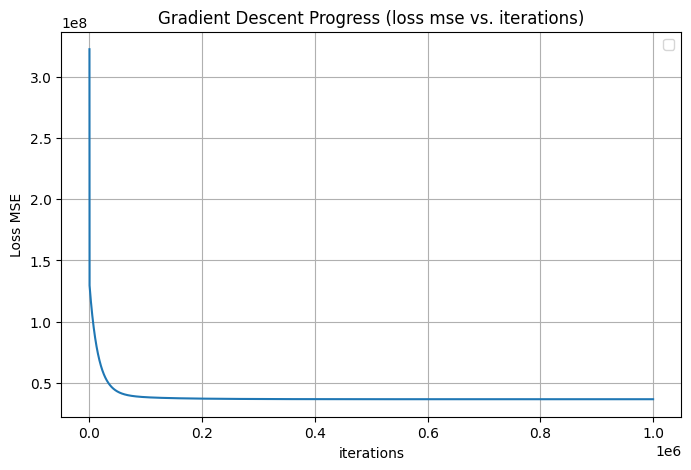

In [43]:
losses=tracings[0]

plt.figure(figsize=(8, 5))
plt.plot(range(iters), losses)
plt.xlabel("iterations")
plt.ylabel("Loss MSE")
plt.title("Gradient Descent Progress (loss mse vs. iterations)")
plt.legend()
plt.grid()
plt.show()

> 3. graficamos como va evolucionado cada parametro y lo comparamos con sklearn

In [44]:
import sklearn.linear_model 


sklearn_model = sklearn.linear_model.LinearRegression()
sklearn_model.fit(X_encoded, y)


sklearn_w = sklearn_model.coef_  # Coeficientes w
sklearn_b = sklearn_model.intercept_  # Intercepto b
y_pred = model.predict(X_encoded)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)


{'R2': np.float64(0.7509124790153553), 'RMSE': np.float64(6041.686389089516), 'MAE': np.float64(4169.440836417572)}


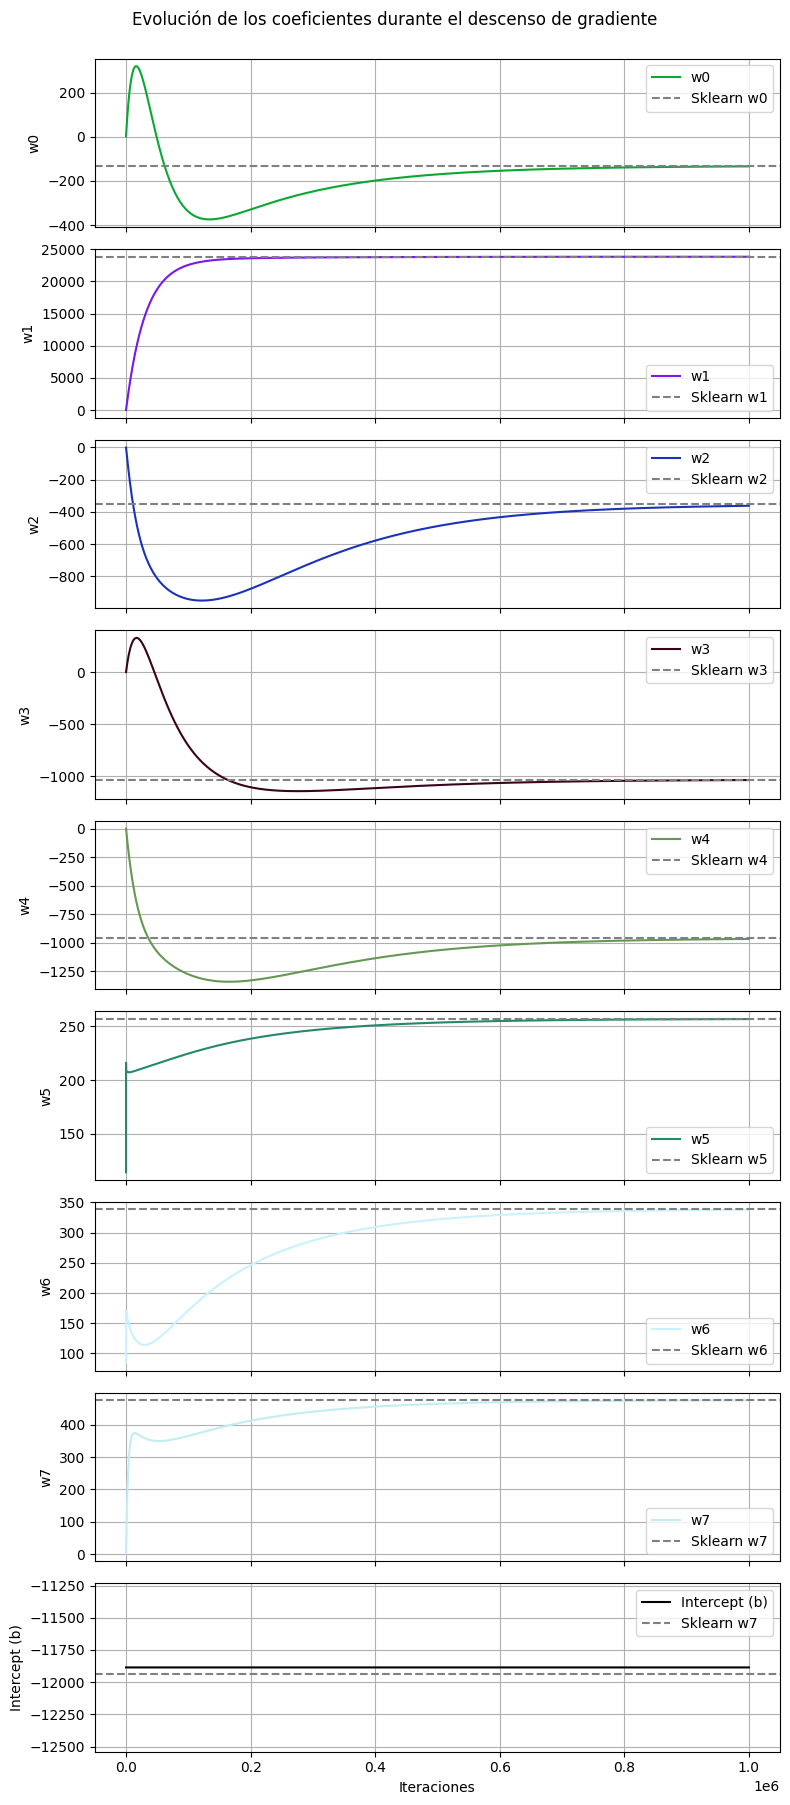

In [45]:


w_values=np.array(tracings[1])
b_values=np.array(tracings[2])


num_features = w_values.shape[1]

fig, axes = plt.subplots(num_features + 1, 1, figsize=(8, 2 * (num_features + 1)), sharex=True)


for i in range(num_features):
    axes[i].plot(range(iters), w_values[:, i], label=f'w{i}', color=np.random.rand(3,))
    axes[i].axhline(y=sklearn_w[i], color='grey', linestyle='dashed', label=f"Sklearn w{i}")
    axes[i].set_ylabel(f'w{i}')
    axes[i].legend()
    axes[i].grid()

axes[-1].plot(range(iters), b_values, label="Intercept (b)", color="black")
axes[-1].axhline(y=sklearn_b, color='grey', linestyle='dashed', label=f"Sklearn w{i}")
axes[-1].set_ylabel("Intercept (b)")
axes[-1].legend()
axes[-1].grid()


axes[-1].set_xlabel("Iteraciones")
fig.suptitle("Evolución de los coeficientes durante el descenso de gradiente",y=1)
plt.tight_layout()
plt.show()
